**Task 1:- Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
telco = pd.read_csv('/content/Telco_Customer_Churn_Dataset.csv')

#missing Value
print("\nMissing value in each column: ")
telco.isnull().sum()




Missing value in each column: 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [2]:
#One Hot Encoding
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco['TotalCharges'] = telco['TotalCharges'].fillna(telco['TotalCharges'].median())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
telco['Churn'] = le.fit_transform(telco['Churn'])

telco = telco.drop(columns=['customerID'])

# One-Hot Encode to all categorical variables
telco = pd.get_dummies(telco, drop_first=True)


print(telco.info())

telco = telco.astype('float64')

print(telco.dtypes)

print(telco.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

**Task 2 :-Split Data for Training and Testing**

In [3]:
from sklearn.model_selection import train_test_split
X = telco.drop('Churn', axis=1)  # Features
y = telco['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
1814            0.0    12.0           19.70        258.35          1.0   
5946            0.0    42.0           73.90       3160.55          0.0   
3881            0.0    71.0           65.15       4681.75          1.0   
2389            0.0    71.0           85.45       6300.85          1.0   
3676            0.0    30.0           70.40       2044.75          1.0   
...             ...     ...             ...           ...          ...   
905             1.0     9.0          100.50        918.60          1.0   
5192            0.0    60.0           19.95       1189.90          1.0   
3980            0.0    28.0          105.70       2979.50          1.0   
235             0.0     2.0           54.40        114.10          1.0   
5157            0.0    16.0           68.25       1114.85          0.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
1814          1.0             1.0               1.0   
5

**Task 3 - Feature Selection**

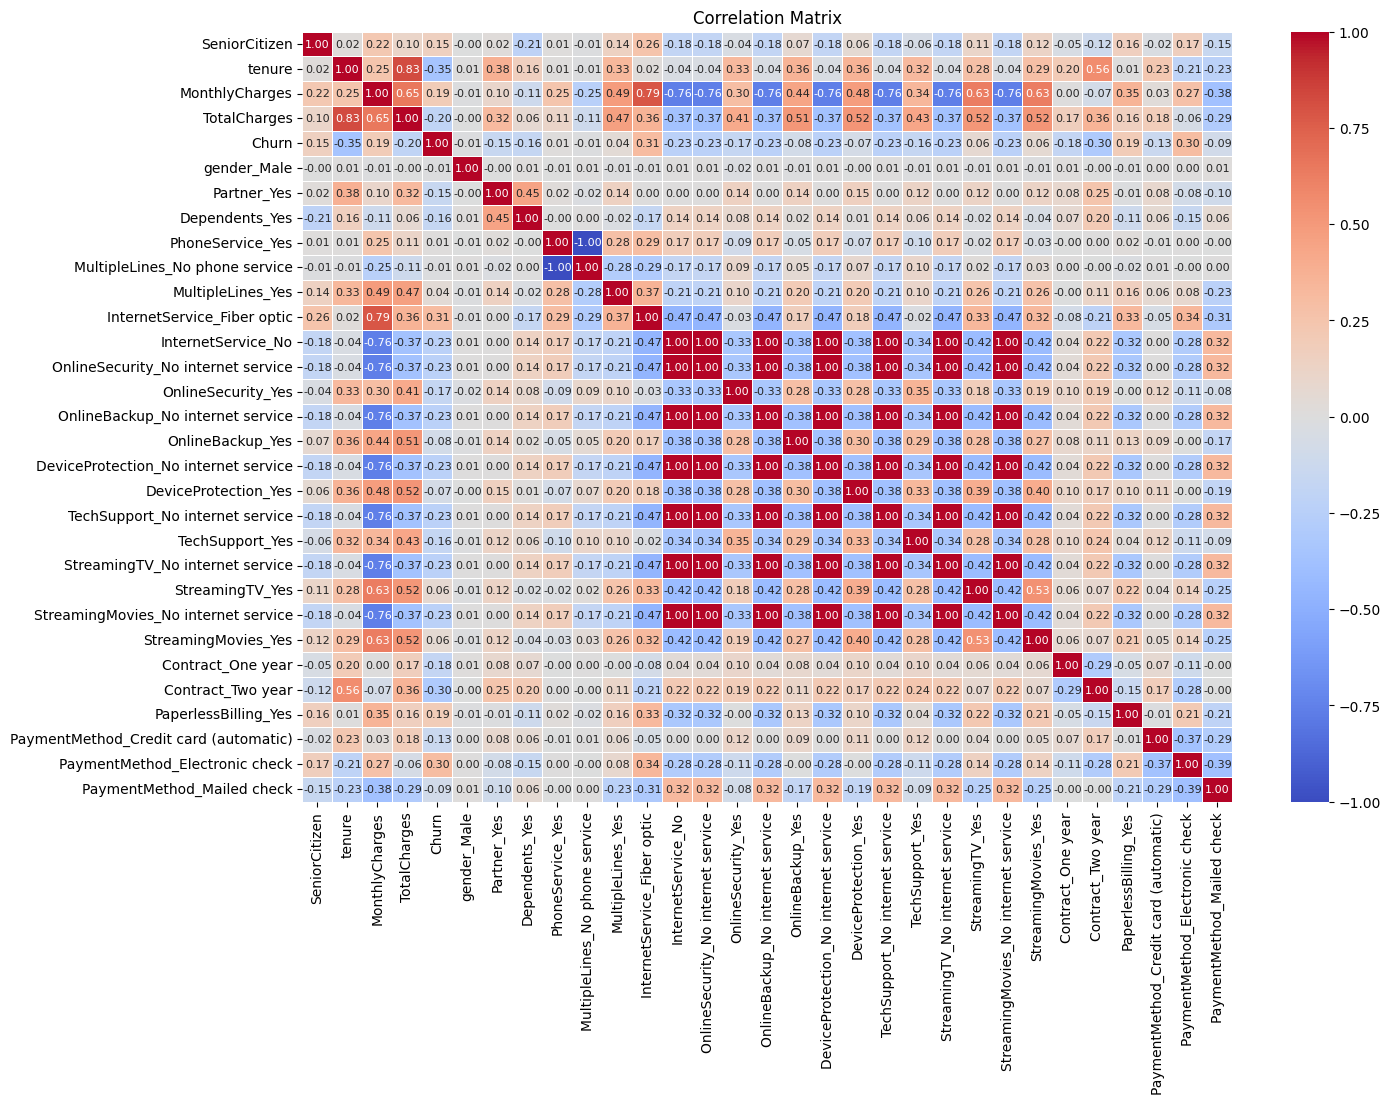

In [4]:
#Correlation_Matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = telco.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size':8}, fmt = '.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In here we have got Contract_Two year	(-0.30) Customers on 2-year contracts are less likely to churn.

Contract_One year	(-0.20) Similar effect but less strong.

tenure	(-0.35) Higher tenure = more loyal = lower churn.

OnlineSecurity_Yes	(-0.28) Customers with online security are less likely to leave.

TechSupport_Yes	(-0.27) Support availability reduces churn.

MonthlyCharges	(+0.19) Slightly higher charges → more churn (but weak).


In [5]:
Selected_features = ['Contract_Two year', 'Contract_One year', 'tenure', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'MonthlyCharges']
X = telco[Selected_features]
y = telco['Churn']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Task 4 - Model Selection***


- **Logistic Regression**: Chosen for interpretability and suitability for binary classification with scaled features.
- **Decision Tree**: Selected to capture non-linear relationships in features like `tenure` and `Contract`.
- **Random Forest**: Used for robustness and handling categorical features post one-hot encoding.
- **Gradient Boosting**: Included for improved performance on imbalanced data.


**Task 5 :- Model Training**

In [8]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state = 0)
Classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

In [9]:
y_pred = Classifier.predict(X_test)
y_pred_proba = Classifier.predict_proba(X_test)  # Predicted probabilities


In [10]:
#Decision Tress
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train GB model
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

**TASK 6 :- MODEL EVALUATION**

In [13]:
#Logistic Regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])

print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

print("AUC Score:\n", auc_score)


Accuracy: 0.7906316536550745
Confusion Matrix:
 [[933 108]
 [187 181]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1041
         1.0       0.63      0.49      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

AUC Score:
 0.8181958192373554


In [14]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

dt_y_pred = dt_classifier.predict(X_test)
dt_y_pred_proba = dt_classifier.predict_proba(X_test)
auc_score_dt = roc_auc_score(y_test, dt_y_pred_proba[:, 1])
print("Decision Tree - Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Decision Tree AUC Score:", auc_score_dt)


Decision Tree - Accuracy: 0.716820440028389
Confusion Matrix:
 [[858 183]
 [216 152]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1041
         1.0       0.45      0.41      0.43       368

    accuracy                           0.72      1409
   macro avg       0.63      0.62      0.62      1409
weighted avg       0.71      0.72      0.71      1409

Decision Tree AUC Score: 0.6308185064528254


In [15]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) # Initialize rf_classifier
rf_classifier.fit(X_train, y_train)

rf_y_pred = rf_classifier.predict(X_test)
rf_y_pred_proba = rf_classifier.predict_proba(X_test)
auc_score_rf = roc_auc_score(y_test, rf_y_pred_proba[:, 1])
print("Random Forest - Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest AUC Score:", auc_score_rf)


Random Forest - Accuracy: 0.752306600425834
Confusion Matrix:
 [[897 144]
 [205 163]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.84      1041
         1.0       0.53      0.44      0.48       368

    accuracy                           0.75      1409
   macro avg       0.67      0.65      0.66      1409
weighted avg       0.74      0.75      0.74      1409

Random Forest AUC Score: 0.7611710625234933


In [16]:
#Gradiant Boost

y_pred_gb = gb_model.predict(X_test)
y_pred_gb_proba = gb_model.predict_proba(X_test)  # Predicted probabilities



print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
auc_score_gb = roc_auc_score(y_test, y_pred_gb_proba[:, 1])
print("Gradient Boosting AUC Score:", auc_score_gb)

Gradient Boosting Classifier:
Accuracy: 0.7849538679914834
Confusion Matrix:
 [[929 112]
 [191 177]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1041
         1.0       0.61      0.48      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

Gradient Boosting AUC Score: 0.8254213131186567


The Summary Table for all evaluation of algorithms used in this .


### Model Evaluation Summary
| Model               | Accuracy | Class 1 Recall | Class 1 Precision | F1 (Class 1) | ROC-AUC |
|---------------------|----------|----------------|-------------------|--------------|---------|
| Logistic Regression | 0.791    | 0.49           | 0.63              | 0.55         | 0.818   |
| Decision Tree       | 0.717    | 0.41           | 0.45              | 0.43         | 0.631   |
| Random Forest       | 0.752    | 0.44           | 0.53              | 0.48         | 0.761   |
| Gradient Boosting   | 0.785    | 0.48           | 0.61              | 0.54         | 0.825   |


### Model Evaluation Insights
Logistic Regression (0.791 accuracy, 0.818 ROC-AUC) and Gradient Boosting (0.785 accuracy, 0.825 ROC-AUC) lead, but low Class 1 recall (0.49, 0.48) shows difficulty predicting churners due to class imbalance (~26% churn). Decision Tree (0.717 accuracy, 0.631 ROC-AUC) overfits. Random Forest (0.752 accuracy, 0.761 ROC-AUC) is moderate. SMOTE could improve recall.
Thank You